In [3]:
#Importing the libraries
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


## Some Numerical Information about the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [5]:
df.nunique()

make                     96
model                  1034
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
segment                   9
dtype: int64

In [6]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

## Data Preprocessing

In [7]:
# Create a Dictionary of the Most Frequent Values of Drive Unit
drive_dic = dict(df['drive_unit'].value_counts().head(4))
drive_dic = {key : value / sum(drive_dic.values()) for key , value in drive_dic.items()}

random.seed(42)
# Define a Function for Replace Missing Values with np.random.choice
def replace_null(dic):
    items = list(dic.keys())
    weights = list(dic.values())
    
    return np.random.choice(items, p=weights)

# Apply replace null Function on Column
df['drive_unit'] = df['drive_unit'].apply(lambda x : replace_null(drive_dic) if pd.isnull(x) else x) 
df['drive_unit'].value_counts()

drive_unit
front-wheel drive             39374
rear drive                     7057
all-wheel drive                6086
part-time four-wheel drive     3727
Name: count, dtype: int64

In [8]:
# Create a Dictionary of the Most Frequent Values of Drive Unit
volume_dic = dict(df['volume(cm3)'].value_counts().head(10))
volume_dic = {key : value / sum(volume_dic.values()) for key , value in volume_dic.items()}

random.seed(42)
# Define a Function for Replace Missing Values with np.random.choice
def replace_null(dic):
    items = list(dic.keys())
    weights = list(dic.values())
    
    return np.random.choice(items, p=weights)

# Apply replace null Function on Column
df['volume(cm3)'] = df['volume(cm3)'].apply(lambda x : replace_null(volume_dic) if pd.isnull(x) else x) 
df['volume(cm3)'].value_counts().head(5)

volume(cm3)
2000.0    10751
1600.0     8653
1800.0     5990
1900.0     3654
2500.0     3403
Name: count, dtype: int64

In [9]:
# Create a Dictionary of the Most Frequent Values of Drive Unit
segment_dic = dict(df['segment'].value_counts().head(9))
segment_dic = {key : value / sum(segment_dic.values()) for key , value in segment_dic.items()}

random.seed(42)
# Define a Function for Replace Missing Values with np.random.choice
def replace_null(dic):
    items = list(dic.keys())
    weights = list(dic.values())
    
    return np.random.choice(items, p=weights)

# Apply replace null Function on Column
df['segment'] = df['segment'].apply(lambda x : replace_null(segment_dic) if pd.isnull(x) else x) 
df['segment'].value_counts().head(5)

segment
D    13934
C    11695
J     9503
M     6991
E     6910
Name: count, dtype: int64

In [10]:
# Categorizing the car make
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make'] = df['make'].apply(car_make)

In [11]:
df = df[df['priceUSD'] < 125000]
df = df[df['year'] >= 1980]

## Data Visualization

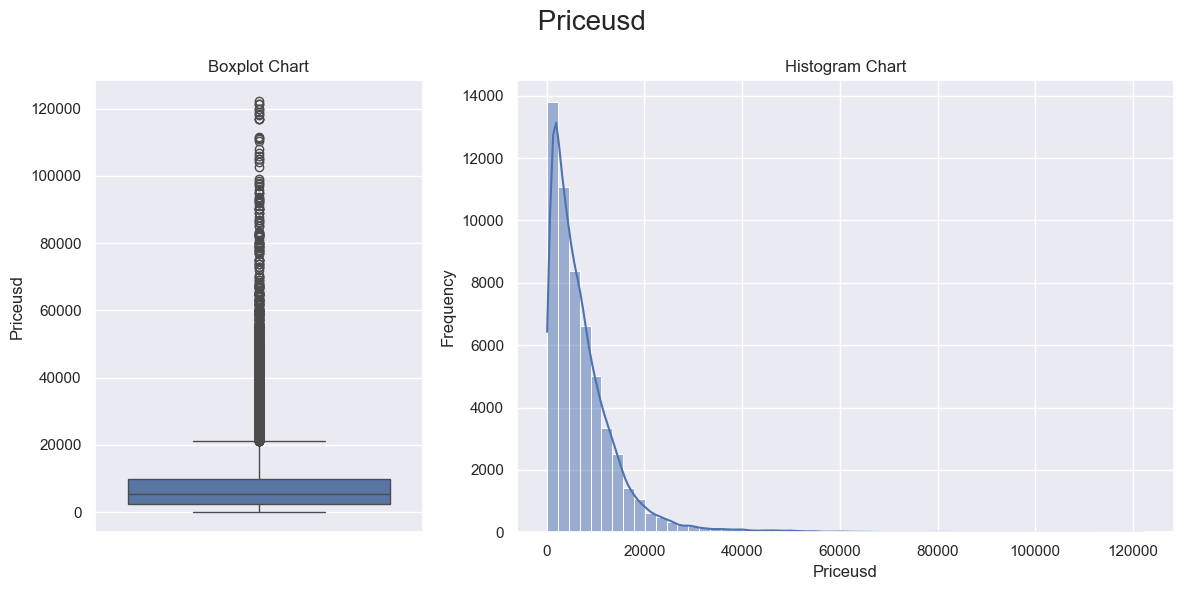

In [12]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()

plot_continious_distribution(df, 'priceUSD')    

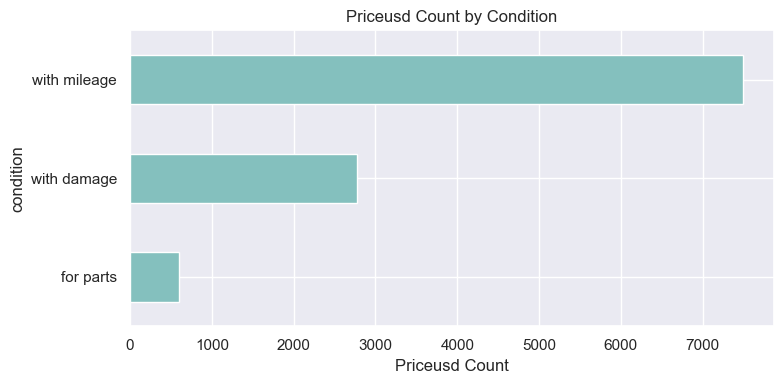

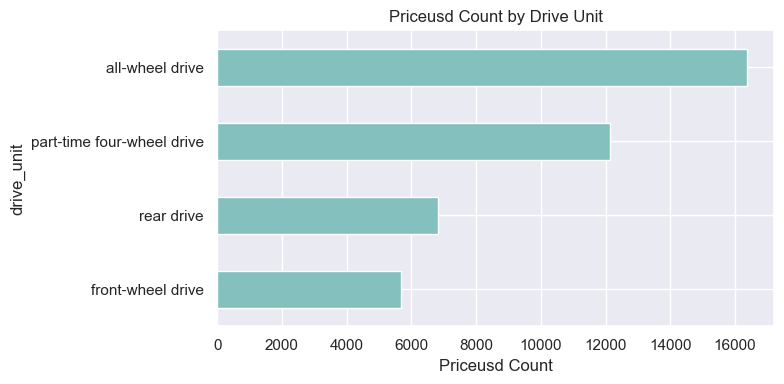

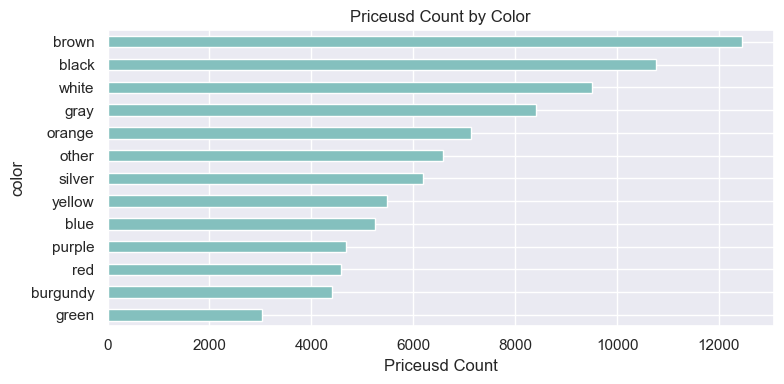

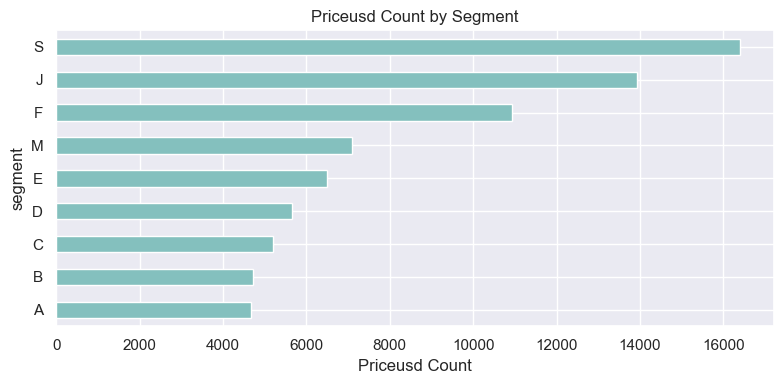

In [13]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#84c0be', figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('condition', 'priceUSD', df)
bar_plot('drive_unit', 'priceUSD', df)
bar_plot('color', 'priceUSD', df)
bar_plot('segment', 'priceUSD', df)

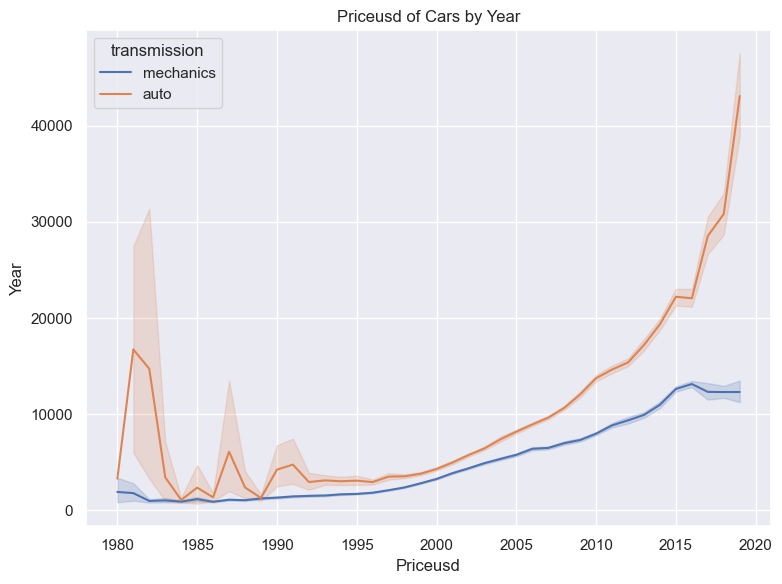

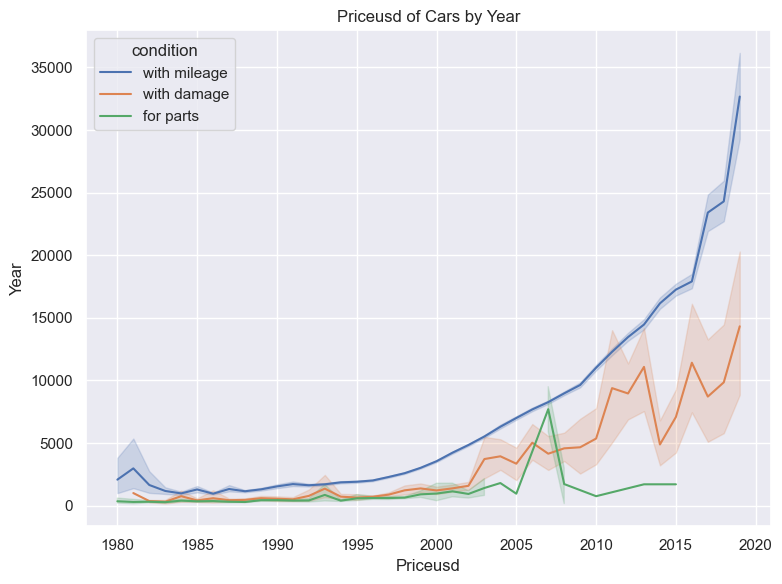

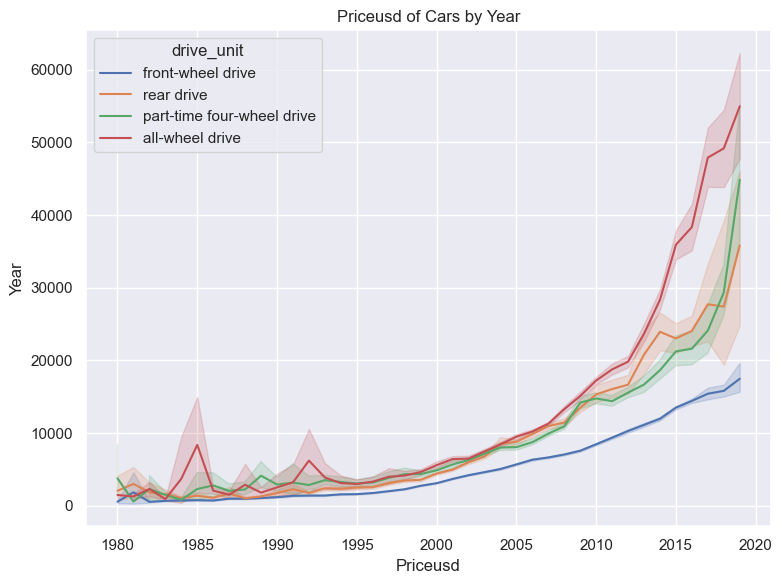

In [14]:
# Define a Function for line Plot
def line_plot(x, y, hue, df):
    
    plt.figure(figsize=(8,6))
    sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'{title(y)} of Cars by {title(x)}')
    plt.xlabel(f'{title(y)}')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

line_plot('year', 'priceUSD', 'transmission', df)
line_plot('year', 'priceUSD', 'condition', df)
line_plot('year', 'priceUSD', 'drive_unit', df)

## Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)']
dum_cols = ['segment', 'drive_unit', 'color', 'fuel_type', 'condition', 'make']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected columns
df['transmission'] = le.fit_transform(df['transmission'])

# Apply Get Dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

In [16]:
from sklearn.model_selection import train_test_split 

x = df.drop(['priceUSD', 'model'], axis=1)
y = df['priceUSD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
#Importing the Libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [18]:
# List of Mdels to Try
models = [
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Gradient Boosting: Mean Squared Error = 0.132, R-squared = 0.859
K-Nearest Neighbors: Mean Squared Error = 0.196, R-squared = 0.79
Decision Tree: Mean Squared Error = 0.203, R-squared = 0.783
Random Forest: Mean Squared Error = 0.114, R-squared = 0.878
XGB Regressor: Mean Squared Error = 0.113, R-squared = 0.88


In [21]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print(f'Training accuracy: XGB Regressor', xgb.score(x_train, y_train))
print(f'Test accuracy: XGB Regressor', round(r2_score(y_test, xgb_pred),3))

Training accuracy: XGB Regressor 0.953018345657595
Test accuracy: XGB Regressor 0.88


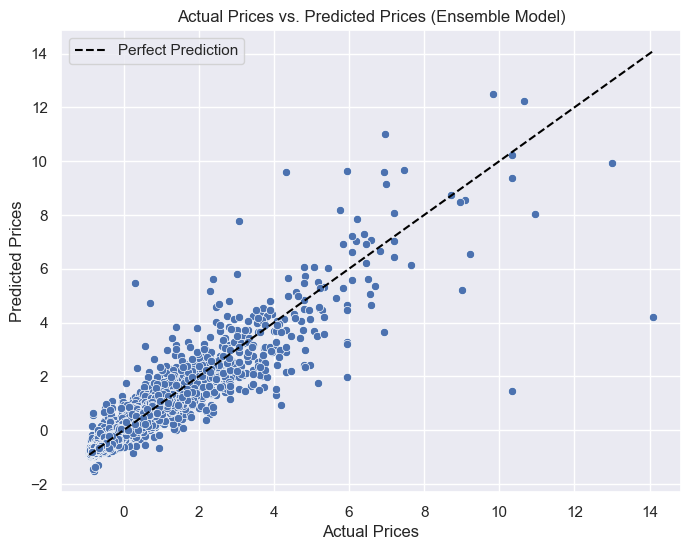

In [22]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Ensemble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion for Belarus Car Price Prediction Dataset

In this project, our objective was to predict car prices in Belarus using a given dataset. The steps involved in the data preprocessing and model training are detailed below:

1. Handling Missing Values:
   - Columns with missing values were filled using custom functions to ensure the distribution of the data remained intact. This step was crucial to maintain the integrity of the dataset.

2. Reduction of Unique Values:
   - The car_make column had a large number of unique values, which were reduced to simplify the model and improve performance.

3. Removal of Outliers:
   - Outliers were identified and removed from the dataset to ensure that extreme values did not negatively impact the model’s performance.

4. Data Visualization:
   - Comprehensive data visualizations were performed to gain insights into the data and understand patterns that could be leveraged for prediction. These visualizations helped in identifying relationships between different features and the target variable.

5. Standardization and Label Encoding:
   - Numerical features were standardized to ensure consistent scaling.
   - Categorical features were label-encoded to convert them into a format suitable for the machine learning model.

6. Model Training:
   - An XGBoost (XGB) model was trained on the preprocessed data. XGBoost was chosen for its efficiency and superior performance in handling structured data.

7. Model Performance:
   - The trained XGBoost model achieved an accuracy of 88%. This indicates that the model performs well in predicting car prices based on the given features.

### Conclusion

This project followed a structured approach to handle the Belarus car price prediction dataset. The initial steps focused on filling missing values in a way that preserved the data distribution, reducing the number of unique values in certain columns, and removing outliers. Thorough data visualization provided valuable insights into the dataset. Standardization and label encoding prepared the data for effective modeling. The XGBoost model, known for its robustness and high performance, proved effective in predicting car prices, achieving an accuracy of 88%.

This approach highlights the importance of meticulous data preprocessing, including handling missing values, reducing complexity, and removing outliers. The successful application of the XGBoost model demonstrates its suitability for similar regression tasks in structured datasets.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com